In [127]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor

In [128]:
# Load dataset
X = np.load('dataset_tensors/X.npy')
y = np.load('dataset_tensors/y.npy')
print(X.shape, y.shape)

(1065, 710) (1065,)


In [129]:
# train models
def train_models(X_train, y_train):
    print("Training...\n")
    t0 = time.time()
    models = []
    
    krr1 = KernelRidge(kernel='linear')
    krr1.fit(X_train, y_train)
    print(krr1)
    models.append(krr1)
    
    krr2 = KernelRidge(kernel='poly')
    krr2.fit(X_train, y_train)
    print(krr2)
    models.append(krr2)
    
    krr3 = KernelRidge(kernel='rbf')
    krr3.fit(X_train, y_train)
    print(krr3)
    models.append(krr3)
    
    krr4 = KernelRidge(kernel='laplacian')
    krr4.fit(X_train, y_train)
    print(krr4)
    models.append(krr4)
    
    krr5 = KernelRidge(kernel='sigmoid')
    krr5.fit(X_train, y_train)
    print(krr5)
    models.append(krr5)

    svr1 = LinearSVR(random_state=42, max_iter=5000)
    svr1.fit(X_train, y_train)
    print(svr1)
    models.append(svr1)
    
    svr2 = SVR(kernel="poly")
    svr2.fit(X_train, y_train)
    print(svr2)
    models.append(svr2)
    
    svr3 = SVR(kernel="rbf")
    svr3.fit(X_train, y_train)
    print(svr3)
    models.append(svr3)

    dtr = DecisionTreeRegressor(random_state=42)
    dtr.fit(X_train, y_train)
    print(dtr)
    models.append(dtr)
    
    t1 = time.time()
    print(f"train time: {t1 - t0: .2f} s\n")
    
    return models

In [130]:
# test models
def test_models(models, X_test, y_test):
    print("Test with MSE loss:\n")
    t0 = time.time()   
    errs = []
    for m in models:
        y_pred = m.predict(X_test)
        err = np.sqrt(np.mean((y_pred - y_test)**2))
        errs.append(err)
        print(f"{m}: {err:.4f}")
    
    t1 = time.time()
    print(f"test time: {t1 - t0: .2f} s\n")
    
    return errs

In [131]:
# KernelRidge kernel : linear > poly > rbf

In [132]:
# Train and test using all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = train_models(X_train, y_train)
errs_all = test_models(models, X_test, y_test)

Training...

KernelRidge()
KernelRidge(kernel='poly')
KernelRidge(kernel='rbf')


C:\Users\ABC\.conda\envs\mytorch\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.00863e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


KernelRidge(kernel='laplacian')
KernelRidge(kernel='sigmoid')


C:\Users\ABC\.conda\envs\mytorch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(max_iter=5000, random_state=42)
SVR(kernel='poly')
SVR()
DecisionTreeRegressor(random_state=42)
train time:  7.77 s

Test with MSE loss:

KernelRidge(): 2.0785
KernelRidge(kernel='poly'): 3.4044
KernelRidge(kernel='rbf'): 6.3342
KernelRidge(kernel='laplacian'): 5.2596
KernelRidge(kernel='sigmoid'): 2.7997
LinearSVR(max_iter=5000, random_state=42): 2.4799
SVR(kernel='poly'): 2.8399
SVR(): 2.8835
DecisionTreeRegressor(random_state=42): 1.9090
test time:  0.32 s



In [133]:
# only head pose features
X1 = X[:, 288: 634]  # head pose features
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
models = train_models(X_train, y_train)
errs_head = test_models(models, X_test, y_test)

Training...

KernelRidge()
KernelRidge(kernel='poly')
KernelRidge(kernel='rbf')


C:\Users\ABC\.conda\envs\mytorch\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.28322e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


KernelRidge(kernel='laplacian')
KernelRidge(kernel='sigmoid')


C:\Users\ABC\.conda\envs\mytorch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(max_iter=5000, random_state=42)
SVR(kernel='poly')
SVR()
DecisionTreeRegressor(random_state=42)
train time:  3.67 s

Test with MSE loss:

KernelRidge(): 2.0339
KernelRidge(kernel='poly'): 3.3477
KernelRidge(kernel='rbf'): 5.7279
KernelRidge(kernel='laplacian'): 4.7434
KernelRidge(kernel='sigmoid'): 2.7997
LinearSVR(max_iter=5000, random_state=42): 2.5008
SVR(kernel='poly'): 2.8581
SVR(): 2.8576
DecisionTreeRegressor(random_state=42): 1.5564
test time:  0.15 s



In [134]:
# only facial features
X2 = np.concatenate([X[:, :288], X[:, 634:-1]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
models = train_models(X_train, y_train)
errs_face = test_models(models, X_test, y_test)

Training...

KernelRidge()
KernelRidge(kernel='poly')
KernelRidge(kernel='rbf')


C:\Users\ABC\.conda\envs\mytorch\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=3.27875e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


KernelRidge(kernel='laplacian')
KernelRidge(kernel='sigmoid')


C:\Users\ABC\.conda\envs\mytorch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(max_iter=5000, random_state=42)
SVR(kernel='poly')
SVR()
DecisionTreeRegressor(random_state=42)
train time:  3.73 s

Test with MSE loss:

KernelRidge(): 2.1766
KernelRidge(kernel='poly'): 3.4953
KernelRidge(kernel='rbf'): 6.3531
KernelRidge(kernel='laplacian'): 5.3439
KernelRidge(kernel='sigmoid'): 2.7997
LinearSVR(max_iter=5000, random_state=42): 2.6727
SVR(kernel='poly'): 2.8528
SVR(): 2.8860
DecisionTreeRegressor(random_state=42): 2.0946
test time:  0.15 s



In [135]:
# only bpm feature
X3 = X[:, -1].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)
models = train_models(X_train, y_train)
errs_bpm = test_models(models, X_test, y_test)

Training...

KernelRidge()
KernelRidge(kernel='poly')
KernelRidge(kernel='rbf')
KernelRidge(kernel='laplacian')
KernelRidge(kernel='sigmoid')
LinearSVR(max_iter=5000, random_state=42)


C:\Users\ABC\.conda\envs\mytorch\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


SVR(kernel='poly')
SVR()
DecisionTreeRegressor(random_state=42)
train time:  0.37 s

Test with MSE loss:

KernelRidge(): 6.4944
KernelRidge(kernel='poly'): 2.7963
KernelRidge(kernel='rbf'): 3.0641
KernelRidge(kernel='laplacian'): 3.0326
KernelRidge(kernel='sigmoid'): 2.7798
LinearSVR(max_iter=5000, random_state=42): 3.0107
SVR(kernel='poly'): 3.0094
SVR(): 3.0214
DecisionTreeRegressor(random_state=42): 2.9346
test time:  0.06 s



In [136]:
# Load new dataset, X_bpm contains bpm sequences, y_bpm contains scores.
X = np.load('dataset_tensors/X_bpm.npy')
y = np.load('dataset_tensors/y_bpm.npy')
print(X.shape, y.shape)

(35, 60) (35,)


In [137]:
# Train and test using bpm sequences as feature.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = train_models(X_train, y_train)
errs_bpmseq = test_models(models, X_test, y_test)

Training...

KernelRidge()
KernelRidge(kernel='poly')
KernelRidge(kernel='rbf')
KernelRidge(kernel='laplacian')
KernelRidge(kernel='sigmoid')
LinearSVR(max_iter=5000, random_state=42)
SVR(kernel='poly')
SVR()
DecisionTreeRegressor(random_state=42)
train time:  0.04 s

Test with MSE loss:

KernelRidge(): 12.7394
KernelRidge(kernel='poly'): 83.0492
KernelRidge(kernel='rbf'): 5.4716
KernelRidge(kernel='laplacian'): 4.9644
KernelRidge(kernel='sigmoid'): 7.2240
LinearSVR(max_iter=5000, random_state=42): 7.6627
SVR(kernel='poly'): 5.1932
SVR(): 4.5956
DecisionTreeRegressor(random_state=42): 5.6315
test time:  0.00 s



C:\Users\ABC\.conda\envs\mytorch\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


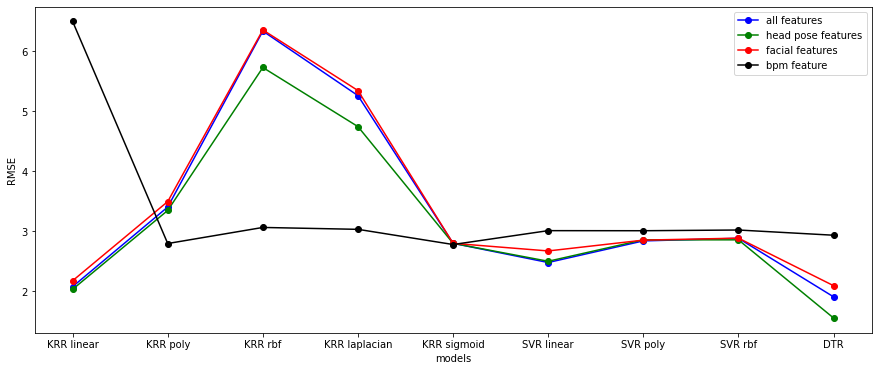

In [139]:
# Plot graphs.
x = ["KRR linear", "KRR poly", "KRR rbf", "KRR laplacian", "KRR sigmoid", "SVR linear", "SVR poly", "SVR rbf", "DTR"]
plt.plot(x, errs_all, 'bo-', label="all features")
plt.plot(x, errs_head, 'go-', label="head pose features")
plt.plot(x, errs_face, 'ro-', label="facial features")
plt.plot(x, errs_bpm, 'ko-', label="bpm feature")
# plt.plot(x, errs_bpmseq, 'co-', label="bpm sequence feature")
plt.rcParams["figure.figsize"] = (15, 6)
plt.title("")
plt.xlabel("models")
plt.ylabel("RMSE")
plt.legend()
plt.show()